# Naive-Bayes model using text data vectorized with word2vec

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [2]:
#import data

%store -r x_text_train_wv_2d
%store -r x_text_test_wv_2d
%store -r y_text_train_wv
%store -r y_text_test_wv

In [3]:
#rename variables for ease of use

x_train =  x_text_train_wv_2d
x_test =  x_text_test_wv_2d
y_train = y_text_train_wv
y_test = y_text_test_wv

### Multinomial Naive Bayes

In [4]:
#scale data with to make usable for Multinomial NB

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.fit_transform(x_test)

In [5]:
#define model

mnb = MultinomialNB()

In [6]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [7]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [8]:
#cross validate on training set to check model stability

cv_scores_w2v_text_mnb = cross_validate(mnb, x_train_scaled, y_train, cv = k_folds, scoring=scorer)

In [9]:
#check cross validation scores

cv_scores_w2v_text_mnb

{'fit_time': array([0.07380009, 0.05881214, 0.05884242, 0.0538559 , 0.05684781]),
 'score_time': array([0.02393651, 0.02593064, 0.02393484, 0.02194166, 0.02792668]),
 'test_accuracy': array([0.67004147, 0.6788241 , 0.67829694, 0.67024521, 0.67829694]),
 'test_precision': array([0.83497191, 0.83143049, 0.82568807, 0.83367698, 0.81806283]),
 'test_recall': array([0.32495217, 0.34198895, 0.34701184, 0.33015787, 0.34635633]),
 'test_f1_score': array([0.46783396, 0.48463496, 0.4886562 , 0.47299669, 0.48666537])}

In [10]:
#fit model on the whole training set
start = process_time()

mnb.fit(x_train_scaled, y_train)

end=process_time()

In [11]:
#test model on test set

y_pred = mnb.predict(x_test_scaled)

In [12]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78     11361
           1       0.60      0.76      0.67      6206

    accuracy                           0.74     17567
   macro avg       0.72      0.74      0.73     17567
weighted avg       0.76      0.74      0.74     17567



In [13]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Multinomial Naive-Bayes model with Text Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

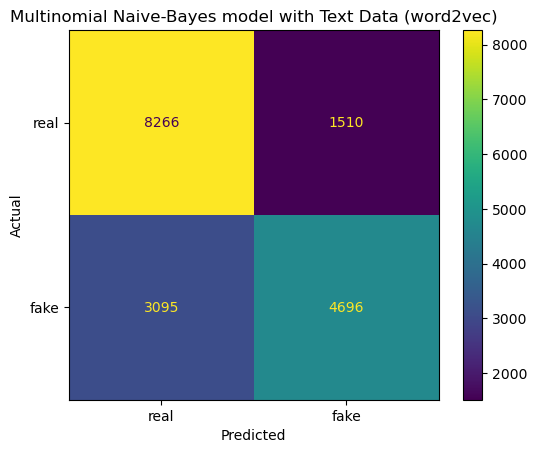

In [14]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Multinomial Naive-Bayes model with Text Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [15]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [16]:
dict = {'data type': 'text',
        'model type':'multinomial Naive-Bayes',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [17]:
w2v_text_mnb=pd.DataFrame.from_dict([dict])

In [18]:
w2v_text_mnb

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,multinomial Naive-Bayes,word2vec,0.737861,0.756687,0.602747,0.671001,0.03125


In [19]:
#save results for later use

%store w2v_text_mnb

Stored 'w2v_text_mnb' (DataFrame)


### Gaussian NB


In [20]:
#define model

gnb = GaussianNB()

In [21]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [22]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [23]:
#cross validate on training set to check model stability

cv_scores_w2v_text_gnb = cross_validate(gnb, x_train, y_train, cv = k_folds, scoring=scorer)

In [24]:
#check cross validation scores

cv_scores_w2v_text_gnb

{'fit_time': array([0.09574389, 0.07978344, 0.08078289, 0.08577037, 0.08676767]),
 'score_time': array([0.05684805, 0.05385637, 0.07380462, 0.0598402 , 0.05385661]),
 'test_accuracy': array([0.76262503, 0.76286899, 0.76625595, 0.76308406, 0.75710626]),
 'test_precision': array([0.74576758, 0.73779796, 0.73642128, 0.74028857, 0.72610397]),
 'test_recall': array([0.71030336, 0.71823204, 0.73561002, 0.726184  , 0.719867  ]),
 'test_f1_score': array([0.72760358, 0.72788354, 0.73601543, 0.73316845, 0.72297203])}

In [25]:
#fit model on the whole training set
start = process_time()

gnb.fit(x_train, y_train)

end=process_time()

In [26]:
#test model on test set

y_pred2 = gnb.predict(x_test)

In [27]:
#view classification report

print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      9893
           1       0.72      0.73      0.73      7674

    accuracy                           0.76     17567
   macro avg       0.76      0.76      0.76     17567
weighted avg       0.76      0.76      0.76     17567



In [28]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred2)


[Text(0.5, 1.0, 'Gaussian Naive-Bayes model with Text Data (word2vec)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

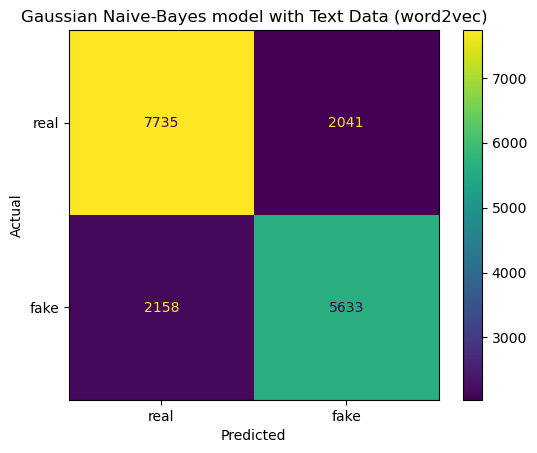

In [29]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Gaussian Naive-Bayes model with Text Data (word2vec)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [30]:
accuracy=accuracy_score(y_test, y_pred2)
precision=precision_score(y_test, y_pred2)
recall=recall_score(y_test, y_pred2)
f1=f1_score(y_test, y_pred2)
fit_time=end-start

In [31]:
dict = {'data type': 'text',
        'model type':'gaussian Naive-Bayes',
        'vectorize type':'word2vec',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [32]:
w2v_text_gnb=pd.DataFrame.from_dict([dict])

In [33]:
w2v_text_gnb

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,gaussian Naive-Bayes,word2vec,0.760972,0.734037,0.723014,0.728484,0.09375


In [34]:
#save results for later use

%store w2v_text_gnb

Stored 'w2v_text_gnb' (DataFrame)
